<a href="https://colab.research.google.com/github/lakshmi14k/DSEMT/blob/main/DSEMT_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODEL INTEPRETABILITY**

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

**DATASET:** https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

**DESCRIPTION:**This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

**The data set consists of:**

**COUNT VARIABLES:** These variables are typically discrete and can follow a Poisson or binomial distribution, depending on the nature of the count.

Example: artist_count

**YEAR/MONTH/DAY VARIABLES:** These variables are categorical and can follow a uniform distribution within the range of possible values.

Example: released_year, released_month, released_day

**NUMERIC VARIABLES:** These variables might follow various distributions.

Example: streams, bpm, danceability_%

**STREAMS:** Skewed distribution, often right-skewed (positively skewed) due to popular songs having significantly more streams.

**BPM:** Depending on the genre, it might follow a normal distribution or be skewed towards certain BPM ranges.

**DANCEABILITY, VALENCE, ENERGY:** These could follow normal distributions or have specific shapes based on music genres.

**PERCENTAGE VARIABLES:** These variables are bounded between 0% and 100%, and their distributions might resemble a beta distribution or a skewed distribution depending on the genre and characteristics of the songs.

Example: danceability_%, valence_%, energy_%

**OTHER AUDIO FEATURES:** These might have diverse distributions based on the audio characteristics of the songs. For example, acousticness might be right skewed if most songs are not acoustic.

Example: acousticness_%, instrumentalness_%, liveness_%, speechiness_%

**INSTALLING SHAP**

In [1]:
!pip install shap


**INSTALLING THE REQUIRED PYTHON PACKAGES**

In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Found existing installation: h2o 3.46.0.1
Uninstalling h2o-3.46.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/h2o-3.46.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/h2o/*
Proceed (Y/n)? Y
  Successfully uninstalled h2o-3.46.0.1
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Using cached h2o-3.46.0.1-py2.py3-none-any.whl (265.6 MB)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
url = "https://raw.githubusercontent.com/lakshmi14k/DSEMT/main/Spotify-2023.csv"
df=pd.read_csv(url, encoding='ISO-8859-1')


In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [6]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [8]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

**DATA PRE-PROCESSING**

In [10]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**DISPLAYING LENGTH OF THE COLUMNS**

In [11]:
len(df.columns)

24

**REMOVING NAN VALUES FROM NUMERIC COLUMNS**

In [12]:
# Remove NaN values from 'in_deezer_playlists' and 'in_shazam_charts' columns
df.dropna(subset=['in_deezer_playlists', 'in_shazam_charts'], inplace=True)

**PRINTING THE DATATYPES**

In [13]:
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


**DATA CLEANING**

**1) REMOVING COMMAS IN THE DATASET**

In [14]:
# Remove commas and convert to int64 for 'in_deezer_playlists' column
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype('int64')

# Verify the data types after conversion
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


**2) CHECKING FOR NON-NUMERIC VALUES IN 'STREAMS' COLUMN**

In [15]:
print(df['streams'].head())

0    141381703
1    133716286
2    140003974
3    800840817
4    303236322
Name: streams, dtype: object


**3) FIXING THE PROBELMATIC RECORDS**

In [16]:
def fix_streams(value):
  try:
    return int(value)
  except ValueError:
    return 0
df['streams'] = df['streams'].apply(fix_streams)

**4) CHECKING  FOR DATAYPES OF CLEANED RECORDS**

In [17]:
print(df['streams'].dtype)
print(df['in_deezer_playlists'].dtype)
print(df['in_shazam_charts'].dtype)

int64
int64
object


**5) PRINTING ALL THE VALUES OF STREAMS**

In [18]:
print(df['streams'].unique())

[ 141381703  133716286  140003974  800840817  303236322  183706234
  725980112   58149378   95217315  553634067  505671438   58255150
 1316855716  387570742 1163093654  496795686   30546883  335222234
  363369738   86444842   52135248 1297026226  200647221  115364561
   78300654  899183384   61245289  429829812  127408954   22581161
   52294266  843957510  999748277  618990393  123122413  188933502
 1355959075  786181836  176553476  354495408 2808096550 1109433169
 1047101291   65156199  570515054 1085685420 1647990401 2565529693
  518745108  107753850  177740666  153372011   57876440  256483385
 1214083358   16011326  812019557  111947664  156338624  720434240
  357925728  674072710 1755214421  404562836  373199958   14780425
   39578178   54266102  751134527 1356565093 1592909789  635412045
 1230675890  585695368   43857627 2009094673  600976848   39709092
   39228929 2665343922  223633238 1440757818  165484133   58054811
  157058870   95131998  250305248  685032533   38411956  14456

**6) CHECKING FOR NON-INTEGER DATA IN STREAMS**

In [19]:
non_integers = df[~df['streams'].astype(str).str.isdigit()]
print(non_integers.shape)

(0, 24)


**7) DROPPING ROW WITH NON-NUMERIC VALUE**

In [20]:
dataset = df.drop(index = 575)
dataset['streams'] = dataset['streams'].astype(int)

**8) IMPUTING KEY VALUE**

In [21]:
key_mode = df['key'].mode()[0]
df['key'] = df['key'].fillna(key_mode)

**8) DROPPING UNNECESSARY COLUMNS AND SPLITING INTO FEATURES AND TARGET**

In [22]:
# Drop non-numeric columns and non-audio features
numeric_data = df.select_dtypes(include=[np.number])
numeric_data = numeric_data.drop(columns=['in_spotify_playlists', 'in_spotify_charts',
                                          'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'in_deezer_playlists'])

# Drop rows with missing values
numeric_data.dropna(inplace=True)

In [23]:
# Dropping categorical values
# Specify the column names you want to drop
columns_to_drop = ['track_name','key','artist(s)_name','mode']

# Drop the specified columns
df_numeric = df.drop(columns=columns_to_drop)

# Drop rows with missing values
df_numeric.dropna(inplace=True)

**9) FINAL CHECK FOR NULL VALUES, DATATYPES, NAN VALUES ETC**

In [24]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            903 non-null    object
 1   artist(s)_name        903 non-null    object
 2   artist_count          903 non-null    int64 
 3   released_year         903 non-null    int64 
 4   released_month        903 non-null    int64 
 5   released_day          903 non-null    int64 
 6   in_spotify_playlists  903 non-null    int64 
 7   in_spotify_charts     903 non-null    int64 
 8   streams               903 non-null    int64 
 9   in_apple_playlists    903 non-null    int64 
 10  in_apple_charts       903 non-null    int64 
 11  in_deezer_playlists   903 non-null    int64 
 12  in_deezer_charts      903 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   903 non-null    int64 
 15  key                   903 non-null    ob

In [25]:
# Missing values
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [26]:
#NaN values
nan_values_total = df.isna().sum().sum()

# Check for NaN values in each column
nan_values_per_column = df.isna().sum()

# Check for NaN values in each row
nan_values_per_row = df.isna().sum(axis=1)

# Check if there are any NaN values in the DataFrame
has_nan_values = df.isna().values.any()

# Print the results
print("Total NaN values:", nan_values_total)


Total NaN values: 0


In [27]:
# Checking for duplicate values
duplicate_values = df.duplicated().sum()
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of duplicate values in the dataframe is: 0


**DROPPING UNNECESSARY COLUMNS**

In [28]:
cleaned_df = df.drop(df.columns[[0,1, 6, 7, 9, 10, 11, 12, 13,15,16]], axis=1)

**PRINTING THE SHAPE OF THE CLEANED DATASET**

In [29]:
cleaned_df.shape

(903, 13)

In [30]:
print(cleaned_df.columns)

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


**CHECKING ISSUES IN CLEANED DATASET**

In [31]:
# Datatypes
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 952
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   artist_count        903 non-null    int64
 1   released_year       903 non-null    int64
 2   released_month      903 non-null    int64
 3   released_day        903 non-null    int64
 4   streams             903 non-null    int64
 5   bpm                 903 non-null    int64
 6   danceability_%      903 non-null    int64
 7   valence_%           903 non-null    int64
 8   energy_%            903 non-null    int64
 9   acousticness_%      903 non-null    int64
 10  instrumentalness_%  903 non-null    int64
 11  liveness_%          903 non-null    int64
 12  speechiness_%       903 non-null    int64
dtypes: int64(13)
memory usage: 131.1 KB


In [32]:
# Missing values
cleaned_df.isnull().sum()

artist_count          0
released_year         0
released_month        0
released_day          0
streams               0
bpm                   0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [33]:
# Checking for duplicate values
duplicate_values = cleaned_df.duplicated().sum()
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of duplicate values in the dataframe is: 0


In [34]:
#NaN values
nan_values_total = cleaned_df.isna().sum().sum()

# Check for NaN values in each column
nan_values_per_column = cleaned_df.isna().sum()

# Check for NaN values in each row
nan_values_per_row = cleaned_df.isna().sum(axis=1)

# Check if there are any NaN values in the DataFrame
has_nan_values = cleaned_df.isna().values.any()

# Print the results
print("Total NaN values:", nan_values_total)


Total NaN values: 0


**10) STORING CLEANED DATASET IN GITHUB**

In [35]:
cleaned_df.to_csv('/content/cleaned_df_spotify23.csv', index=False)

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import shutil
shutil.copy('/content/cleaned_df_spotify23.csv', '/content/drive/My Drive/')

'/content/drive/My Drive/cleaned_df_spotify23.csv'

In [38]:
cleaned_df.shape

(903, 13)

In [39]:
# Split features (X) and target (y)
X0 = numeric_data.drop(columns=['artist_count'])
y0 = numeric_data['streams']

**MAKING X INDEPENEDENT OF TARGET VARIABLE**

In [40]:
X0= cleaned_df[['artist_count','released_year','released_month','released_day','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]
y0 = cleaned_df['streams']

**PRINTING X**

In [41]:
X0

,artist_count,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,125,80,89,83,31,0,8,4
1,1,2023,3,23,92,71,61,74,7,0,10,4
2,1,2023,6,30,138,51,32,53,17,0,31,6
3,1,2019,8,23,170,55,58,72,11,0,11,15
4,1,2023,5,18,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,144,60,24,39,57,0,8,3
949,1,2022,10,21,166,42,7,24,83,1,12,6
950,2,2022,11,3,92,80,81,67,4,0,8,6
951,3,2022,10,20,97,82,67,77,8,0,12,5


**PRINTING y**

In [42]:
y0

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 903, dtype: int64

<Axes: >

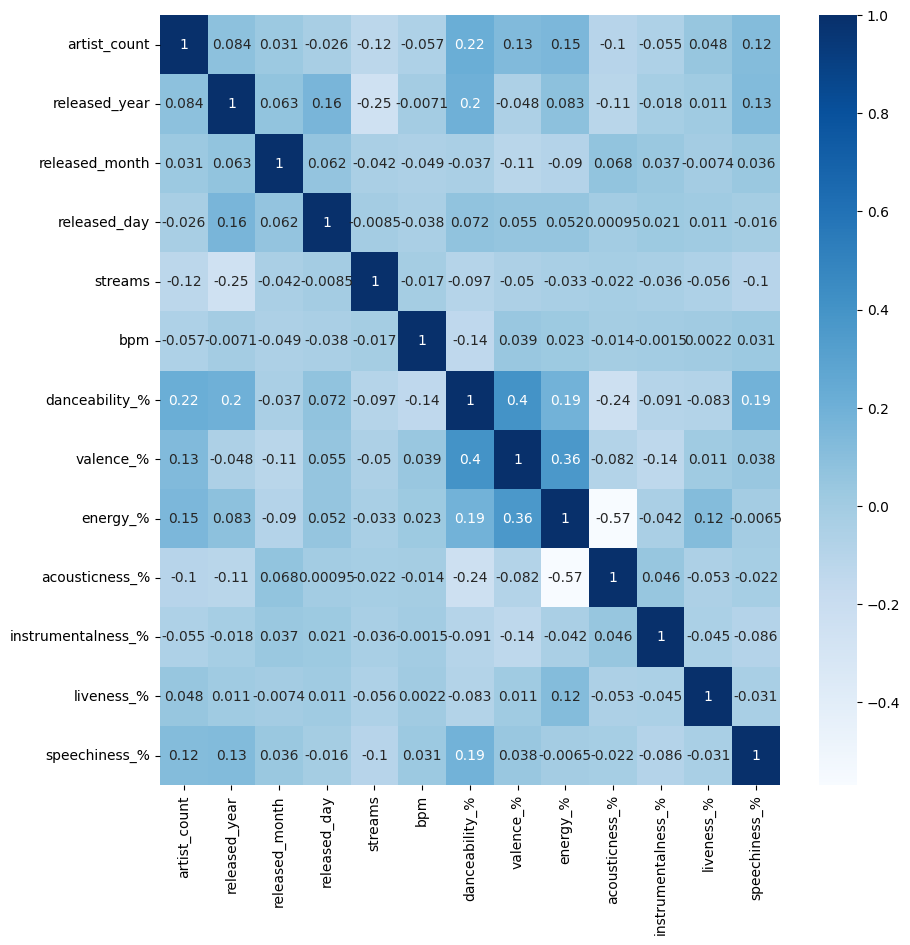

In [43]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(
    cleaned_df.corr(), annot=True, cmap="Blues"
)

**1) Fit a linear model and interpret the regression coefficients**

In [44]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, shuffle=False)
catagorical_features = ['artist_count']

In [45]:
numerical_features = [c for c in X0_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_X0_train = mapper.fit_transform(X0_train)
preprocessed_X0_train = sm.add_constant(preprocessed_X0_train)
reg = sm.OLS(y0_train, preprocessed_X0_train).fit()


In [46]:
def evaluate(X0, y0, mapper=None, reg=None, transform=False):
    if transform:
        X0 = mapper.transform(X0)
        X0 = sm.add_constant(X0, has_constant='add')
    y0_pred = reg.predict(X0)
    return mean_absolute_error(y0, y0_pred)

In [47]:
print(X0_test.shape)
print(X0_train.shape)

(181, 12)
(722, 12)


In [48]:
print(X0_test.columns)
print(X0_train.columns)

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        cleaned_df[col] = LabelEncoder().fit_transform(cleaned_df[col])

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y0_train = le.fit_transform(y0_train)

In [51]:
model = LinearRegression()
model.fit(X0_train, y0_train)

LinearRegression()

In [52]:
import statsmodels.api as sm

# Define independent variables (features)
X = cleaned_df[['artist_count','released_year','released_month','released_day','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define dependent variable
y = cleaned_df['streams']

# Fit the OLS regression model
regmodel = sm.OLS(y, X).fit()

# Print model summary
print(regmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.292
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.30e-13
Time:                        20:11:03   Log-Likelihood:                -19361.
No. Observations:                 903   AIC:                         3.875e+04
Df Residuals:                     890   BIC:                         3.881e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.38e+10   3.23

**Model Fit:**

Dependent Variable: Streams

R-squared= 0.089
The model explains approximately 8.9% of the variance in the number of streams. This indicates that the model's ability to predict the number of streams based on the given features is relatively low.

Adj. R-squared = 0.077
This value takes into account the number of predictors in the model. It is typically lower than the value, especially when additional predictors are added to the model. In this case, it indicates that approximately 7.7% of the variance in the number of streams is explained by the independent variables, adjusted for the number of predictors.

Both r-squared and adjusted r-squared
values are relatively low (less than 0.1), suggesting that the model has limited explanatory power in predicting the number of streams based on the given independent variables.

Variable Significance:
The coefficients of some independent variables have p-values less than 0.05, indicating statistical significance. These variables are "const", "released_year", and "artist_count". Other variables do not appear to be statistically significant based on the p-values.


In [53]:
reg_train_mae = evaluate(X0_train, y0_train, mapper, reg, True)
reg_test_mae = evaluate(X0_test, y0_test, mapper, reg, True)
print(f"Train MAE = {round(reg_train_mae, 3)}")
print(f"Test MAE = {round(reg_test_mae, 3)}")

Train MAE = 522690627.92
Test MAE = 296327897.366


**Training MAE:**
This value indicates that, on average, the predictions made by your linear regression model on the training data are off by approximately 522 million units.
A high train MAE suggests that the model might not be capturing the underlying patterns in the training data well, resulting in significant prediction errors.

**Testing MAE:**
The test MAE represents the average absolute difference between the predicted and actual values on unseen test data.
This value suggests that, on average, the predictions made by the model on the test data are off by approximately 297 million units.
The test MAE being lower than the train MAE is a positive sign, indicating that the model is generalizing reasonably well to unseen data.



In [54]:
from sklearn.metrics import r2_score

In [55]:
reg_train_score = r2_score(y0_train, model.predict(X0_train))
reg_test_score = r2_score(y0_test, model.predict(X0_test))

In [56]:
print("R2 score (train):", reg_train_score)
print("R2 score (test):", reg_test_score)

R2 score (train): 0.10979418221236603
R2 score (test): -1.1677571562877938


Training r-squared : 0.11
This value indicates that approximately 11% of the variance in the target variable (streams) is explained by the linear regression model when trained on the training data.
A higher training r-squared score suggests that the model fits the training data better and explains more of the variance.

Testing r-squared score: -1.168
The negative value of the testing r-squared score suggests that the linear regression model performs worse than a horizontal line (a model that predicts the mean of the target variable for all samples) on the unseen test data.
A negative r-squared score indicates that the model is performing very poorly and is not able to explain the variance in the test data.

***INFERENCE OF LINEAR REGRESSION MODEL:***

Based on the provided information, it appears that the linear regression model may not be an ideal fit for the data due to its low R-squared value and higher test MAE than train MAE, indicating potential overfitting. As a result, it may be necessary to explore other modeling options or adjust the current model by adding or transforming features to improve its accuracy and generalization ability.

**2. Fit a tree-based model and interpret the nodes**

**IMPORTING THE NECESSARY LIBRARIES**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

**RUNNING TREE REGRESSOR**

In [58]:
# Select predictors and target variable.
X1 = cleaned_df[['artist_count','released_year','released_month','released_day','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]
y1 = cleaned_df['streams']

In [59]:
# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
catagorical_features = ['artist_count']

In [60]:
# Fit the Decision Tree Regressor
treemodel = DecisionTreeRegressor(random_state=42)
treemodel.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=42)

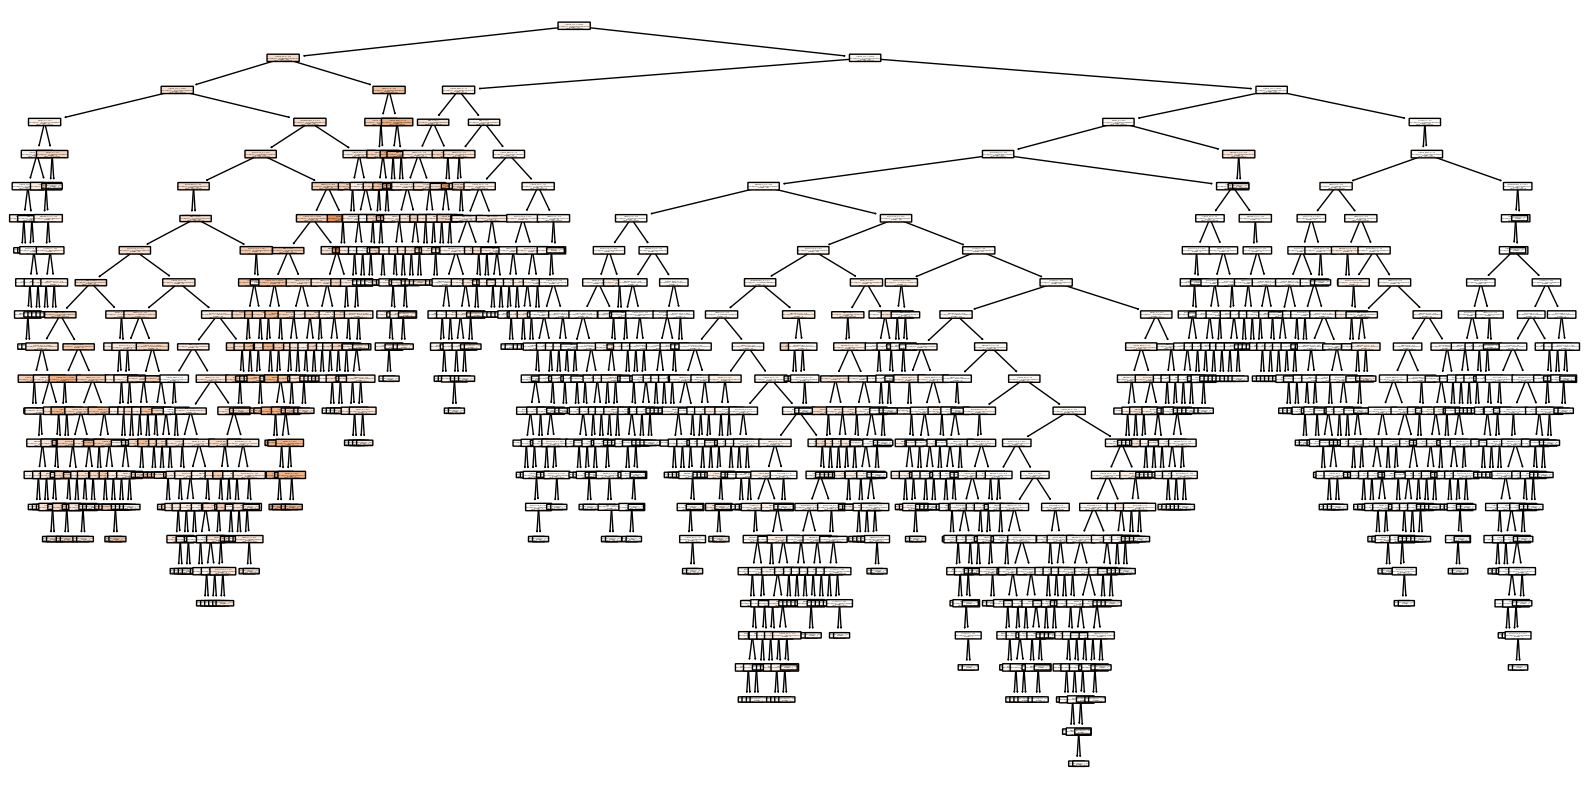

In [61]:
# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(treemodel, filled=True, feature_names=['artist_count','released_year','released_month','released_day','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%'], rounded=True)
plt.show()

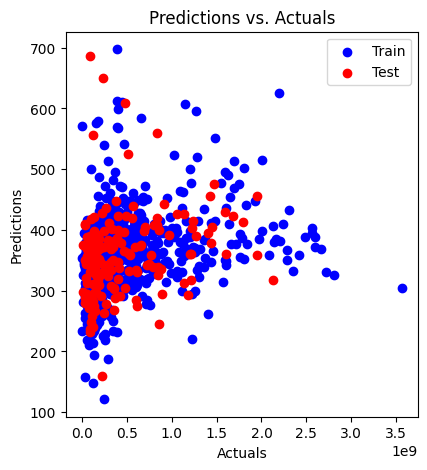

In [62]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y1_train, model.predict(X1_train), color='blue', label='Train')
plt.scatter(y1_test, model.predict(X1_test), color='red', label='Test')
plt.title('Predictions vs. Actuals')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.legend()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
mae_train = mean_absolute_error(y1_train, model.predict(X1_train))
mae_test = mean_absolute_error(y1_test, model.predict(X1_test))
mse_train = mean_squared_error(y1_train, model.predict(X1_train))
mse_test = mean_squared_error(y1_test, model.predict(X1_test))

In [65]:
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MAE: 476577016.67237115
Test MAE: 437340619.41331565
Train MSE: 5.132681951666742e+17
Test MSE: 3.948652212953949e+17


**Train MAE and MSE:** The large train MAE and MSE values suggest that the model is not fitting the training data well and is likely suffering from overfitting. The model is making very large errors when predicting on the training data.

**Test MAE and MSE:** The test MAE and MSE values are relatively smaller compared to the train values, indicating that the model is performing better on unseen data. However, the test MSE is still very high, suggesting that the model's predictions on the test set are also inaccurate.

In [66]:
tree_train_score = treemodel.score(X1_train, y1_train)
tree_test_score = treemodel.score(X1_test, y1_test)
print(f"Training R^2 score: {tree_train_score}")
print(f"Testing R^2 score: {tree_test_score}")

Training R^2 score: 1.0
Testing R^2 score: -0.05201102441451755


**Training R-squared score:** A perfect R-squared score of 1.0 indicates that the model explains all the variance in the training data, meaning it perfectly fits the training data. However, this could also be a sign of overfitting, where the model memorizes the training data without capturing the underlying patterns. Further evaluation is needed to determine if overfitting is occurring.

**Testing R-squared score:**The testing R-squared score -0.052 indicates that the model performs poorly on unseen data, suggesting overfitting. Negative r-squared scores can occur when the model performs even worse than a model that predicts the mean of the target variable.well to new data.

***INFERENCE OF TREE REGRESSOR MODEL:***

In summary, the tree regressor model appears to be overfitting the training data, as evidenced by the perfect R-squared score on the training data and the significantly worse performance on the test data. The large MAE and MSE values further indicate that the model's predictions are not accurate, both on the training and test sets. Therefore, the model is not a good fit and may require further optimization or regularization techniques to improve its generalization performance.

**3.  Use Auto ML to find the best model**

**INITIALIZING THE H20 CLUSTER IN PYTHON**

In [67]:
import h2o
from h2o.automl import H2OAutoML

In [68]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 42 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_czo8q0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**SETTING PARAMETERS FOR THE H20 CLUSTER**

In [69]:
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [70]:
min_mem_size=6
run_time=222

In [71]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [72]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26772..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb4_4ukjr
  JVM stdout: /tmp/tmpb4_4ukjr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb4_4ukjr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26772
Connecting to H2O server at http://127.0.0.1:26772 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_4apnqk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [73]:
h2o_df = h2o.H2OFrame(cleaned_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [74]:
h2o_df.head()

artist_count,released_year,released_month,released_day,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
2,2023,7,14,1.41382e+08,125,80,89,83,31,0,8,4
1,2023,3,23,1.33716e+08,92,71,61,74,7,0,10,4
1,2023,6,30,1.40004e+08,138,51,32,53,17,0,31,6
1,2019,8,23,8.00841e+08,170,55,58,72,11,0,11,15
1,2023,5,18,3.03236e+08,144,65,23,80,14,63,11,6
2,2023,6,1,1.83706e+08,141,92,66,58,19,0,8,24
2,2023,3,16,7.2598e+08,148,67,83,76,48,0,8,3
1,2023,7,7,5.81494e+07,100,67,26,71,37,0,11,4
1,2023,5,15,9.52173e+07,130,85,22,62,12,0,28,9
2,2023,3,17,5.53634e+08,170,81,56,48,21,0,8,33


In [75]:
h2o_df.describe()

Rows:903
Cols:13

,artist_count,released_year,released_month,released_day,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
type,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,1930.0,1.0,1.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
mean,1.565891472868218,2018.4263565891488,6.029900332225914,13.905869324473977,468712713.56367636,122.37652270210401,67.1539313399779,51.345514950166084,64.33444075304539,26.75083056478407,1.6423034330011068,18.19269102990031,10.280177187153923
maxs,8.0,2023.0,12.0,31.0,3562543890.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0
sigma,0.8883512328019688,10.916476527282315,3.5635181380187753,9.20407933351205,519752883.514429,27.876986317848345,14.650155457419018,23.51435376458898,16.60673997265839,25.863168361412587,8.620057567732319,13.71828015378837,10.062119429756377
zeros,0,0,0,0,1,0,0,0,0,57,819,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2.0,2023.0,7.0,14.0,141381703.0,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,1.0,2023.0,3.0,23.0,133716286.0,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,1.0,2023.0,6.0,30.0,140003974.0,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0


In [76]:
h2o_df.types

{'artist_count': 'int',
 'released_year': 'int',
 'released_month': 'int',
 'released_day': 'int',
 'streams': 'int',
 'bpm': 'int',
 'danceability_%': 'int',
 'valence_%': 'int',
 'energy_%': 'int',
 'acousticness_%': 'int',
 'instrumentalness_%': 'int',
 'liveness_%': 'int',
 'speechiness_%': 'int'}

In [77]:
h2o_df.shape

(903, 13)

In [78]:
# Check for NaN values in each column
nan_values_per_column = h2o_df.isna().sum()

# Check for NaN values in each row
nan_values_per_row = h2o_df.isna().sum(axis=1)

# Print the results
print("\nNaN values per column:")
print(nan_values_per_column)
print("\nNaN values per row:")
print(nan_values_per_row)


NaN values per column:
0.0

NaN values per row:
0.0


**FITTING THE MODEL IN OLS MODEL**

In [79]:
# Define the predictors and target
X2 = cleaned_df[['artist_count','released_year','released_month','released_day','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]
Y2 = cleaned_df['streams']

# Add constant term to the predictors
X2 = sm.add_constant(X2)

# Fit the OLS model
model = sm.OLS(Y2, X2).fit()

# Display the summary of the OLS model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.292
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.30e-13
Time:                        20:12:31   Log-Likelihood:                -19361.
No. Observations:                 903   AIC:                         3.875e+04
Df Residuals:                     890   BIC:                         3.881e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.38e+10   3.23

**FINDING THE VARIANCE INFLATION FACTOR**

In [80]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multic = cleaned_df[['artist_count','released_year','released_month','released_day','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]

vif_values = []
for i in range(Multic.shape[1]):
    vif = variance_inflation_factor(Multic.values, i)
    vif_values.append(vif)

vif = pd.DataFrame({'variables': Multic.columns, 'VIF': vif_values})
print(vif)

             variables        VIF
0         artist_count   4.457095
1        released_year  92.811730
2       released_month   3.979877
3         released_day   3.352275
4                  bpm  21.210325
5       danceability_%  31.571153
6            valence_%   8.453440
7             energy_%  28.912813
8       acousticness_%   3.354088
9   instrumentalness_%   1.070242
10          liveness_%   2.853125
11       speechiness_%   2.168527


**instrumentalness_%:** This predictor has the lowest VIF value of 1.070242, indicating that it has the least multicollinearity with other predictors in the model. Therefore, according to the VIF values, instrumentalness_% is the most important predictor.

In [81]:
train, test = h2o_df.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [82]:
# Check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [83]:
drift_data["is_train"].table()

is_train,Count
0,223
1,680


In [84]:
T = list(set(train.col_names) - set(["streams"]))

**PASSING THE DATA THROUGH AUTOML**

In [85]:
#Pass the data through H20AutoML
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(y="streams", training_frame=train)

AutoML progress: |
20:12:33.94: _train param, Dropping bad and constant columns: [is_train]

█
20:12:37.200: _train param, Dropping bad and constant columns: [is_train]


20:12:37.955: _train param, Dropping bad and constant columns: [is_train]

██
20:12:40.551: _train param, Dropping bad and constant columns: [is_train]

██
20:12:45.338: _train param, Dropping bad and constant columns: [is_train]

███
20:12:54.14: _train param, Dropping bad and constant columns: [is_train]

█
20:12:55.494: _train param, Dropping bad and constant columns: [is_train]


20:12:58.25: _train param, Dropping bad and constant columns: [is_train]

█
20:12:59.589: _train param, Dropping bad and constant columns: [is_train]

█
20:13:01.731: _train param, Dropping bad and constant columns: [is_train]

██
20:13:07.409: _train param, Dropping unused columns: [is_train]

█
20:13:08.368: _train param, Dropping unused columns: [is_train]

█████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


**AUTOML LEADERBOARD**

In [86]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_201232,2.52691e+08,3.82709e+08,1.46466e+17,0.901658,1.46466e+17
StackedEnsemble_AllModels_1_AutoML_1_20240318_201232,2.54689e+08,3.88456e+08,1.50898e+17,0.906187,1.50898e+17
GBM_2_AutoML_1_20240318_201232,2.56252e+08,3.86838e+08,1.49643e+17,0.896326,1.49643e+17
GBM_4_AutoML_1_20240318_201232,2.59372e+08,3.91765e+08,1.5348e+17,0.924446,1.5348e+17
GBM_3_AutoML_1_20240318_201232,2.61905e+08,3.94097e+08,1.55312e+17,0.942918,1.55312e+17
XRT_1_AutoML_1_20240318_201232,2.64872e+08,3.91217e+08,1.5305e+17,0.971468,1.5305e+17
XGBoost_3_AutoML_1_20240318_201232,2.69385e+08,4.05302e+08,1.64269e+17,nan,1.64269e+17
GBM_1_AutoML_1_20240318_201232,2.70573e+08,4.0429e+08,1.63451e+17,0.967007,1.63451e+17
DRF_1_AutoML_1_20240318_201232,2.71331e+08,4.01979e+08,1.61587e+17,0.97701,1.61587e+17
XGBoost_1_AutoML_1_20240318_201232,2.86069e+08,4.19881e+08,1.763e+17,nan,1.763e+17


**PRINTING THE BEST MODEL**

In [87]:
best_model = aml.leader
print("Best Model Details:")
print(best_model)

Best Model Details:
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_201232


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2.8792495896228396e+16
RMSE: 169683516.86663145
MAE: 111236357.28716455
RMSLE: 0.5751541038982025
Mean Residual Deviance: 2.8792495896228396e+16
R^2: 0.8919966248014582
Null d

***INFERENCE OF TREE REGRESSOR MODEL:***

The Stacked Ensemble model exhibits strong performance on the training data with a high R-squared value of approximately 0.892, indicating that the model explains around 89.2% of the variance in the target variable on the training set.

However, the performance on the cross-validation data is not as impressive, with a lower R-squared value of approximately 0.451. This suggests that the model may not generalize well to unseen data or may be overfitting to the training data.

The high MAE and MSE values on the cross-validation data further indicate that the model's predictions deviate significantly from the actual values in the test set.

Overall, while the Stacked Ensemble model performs well on the training data, its performance on unseen data needs improvement to ensure better generalization and predictive accuracy.

**4. Perform SHAP Analysis**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd

# Re-split the data into training and testing sets with a 10% test size, without shuffling
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Define the preprocessing for numerical features
numerical_features = ['artist_count','released_year','released_month','released_day','bpm','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Since all features have been treated as numerical due to encoding, apply the numerical pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features)
])

# Create the modeling pipeline including preprocessing and the regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X4_train, y4_train)

# Now, the pipeline is correctly set up for predictions and evaluations


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['artist_count',
                                                   'released_year',
                                                   'released_month',
                                                   'released_day', 'bpm',
                                                   'valence_%', 'energy_%',
                                                   'acousticness_%',
                                                   'instrumentalness_%',
                                                   'liveness_%',
                                                   'speechiness_%'])])),
                ('regressor', LinearRegression())])

In [89]:
nan_frame = pd.DataFrame(columns=numerical_features, index=[0])
nan_frame

,artist_count,released_year,released_month,released_day,bpm,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
X4_test.iloc[0: 1]


,const,artist_count,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
861,1.0,1,2022,5,13,154,70,97,62,47,0,10,4


In [91]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 492347274.846


 The expected value of the output is 492347274.846. This means that when all input features are at their average or default values, the model predicts an output value of approximately 492,347,275.

In [92]:
# Make a prediction for the first sample in the X_test set
sample_prediction = round(pipeline.predict(X4_test.iloc[0:1])[0], 3)

# Retrieve the actual value using the corresponding index from the y_test set
actual_value = y4_test.iloc[0]

# Print the prediction and the actual value
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 404490031.848, Actual value: 164856284


The model's prediction is significantly higher than the actual value. Such a large difference between the predicted and actual values indicates that the model may not be accurately capturing the underlying patterns in the data.

In [93]:
X4_test.iloc[0: 1]

,const,artist_count,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
861,1.0,1,2022,5,13,154,70,97,62,47,0,10,4


In [95]:
import shap

In [96]:
explainer = shap.Explainer(pipeline.predict, X4_train)
shap_values = explainer(X4_test)

PermutationExplainer explainer: 92it [00:18,  3.58it/s]


In [97]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X4_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X4_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

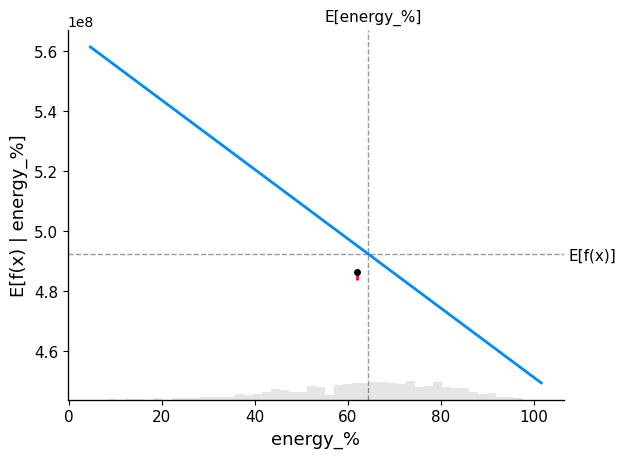

In [98]:
partial_dependence_plot('energy_%', 0)

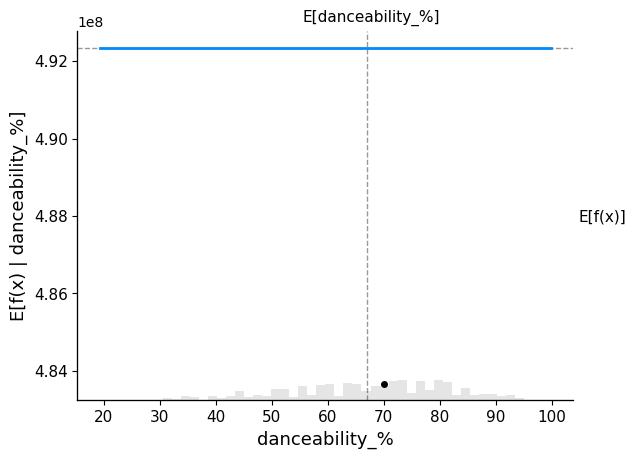

In [99]:
partial_dependence_plot('danceability_%', 0)

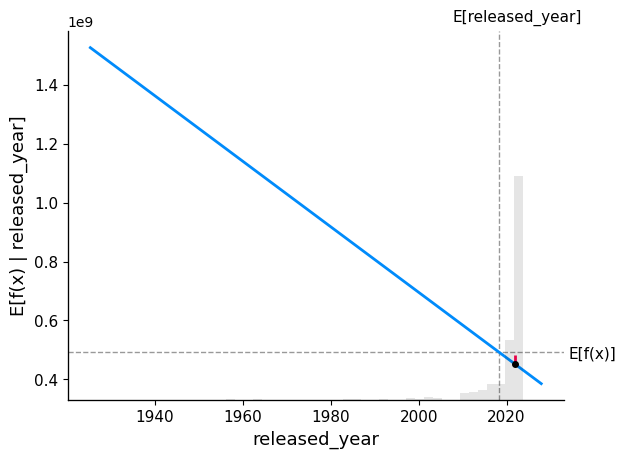

In [100]:
partial_dependence_plot('released_year', 0)

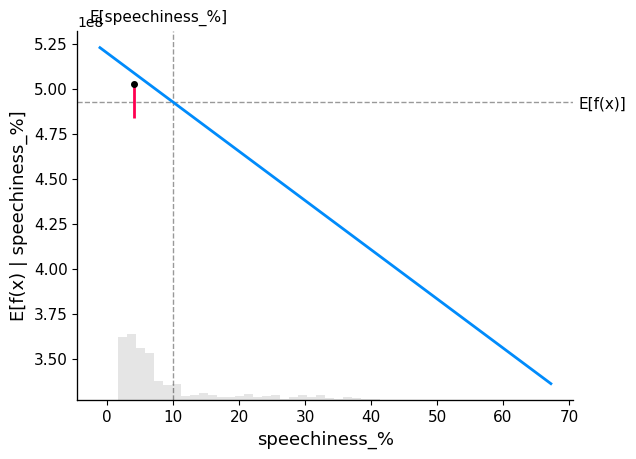

In [101]:
partial_dependence_plot('speechiness_%', 0)

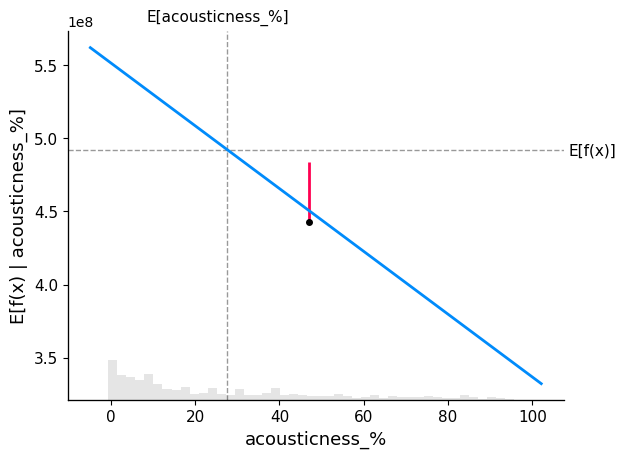

In [102]:
partial_dependence_plot('acousticness_%', 0)

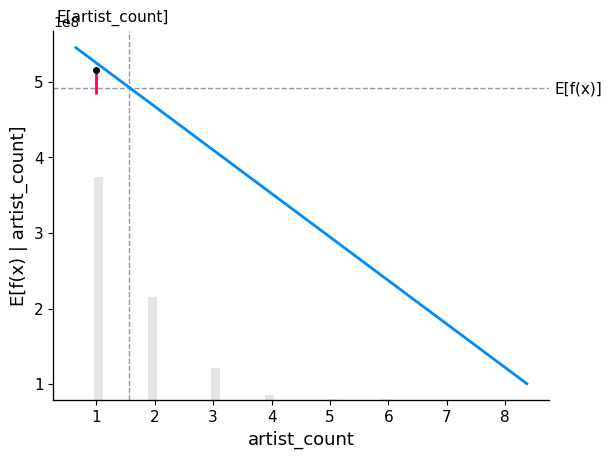

In [103]:
partial_dependence_plot('artist_count', 0)

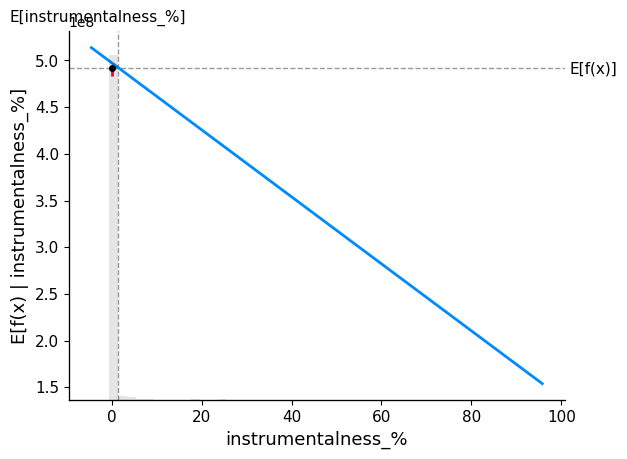

In [104]:
partial_dependence_plot('instrumentalness_%', 0)

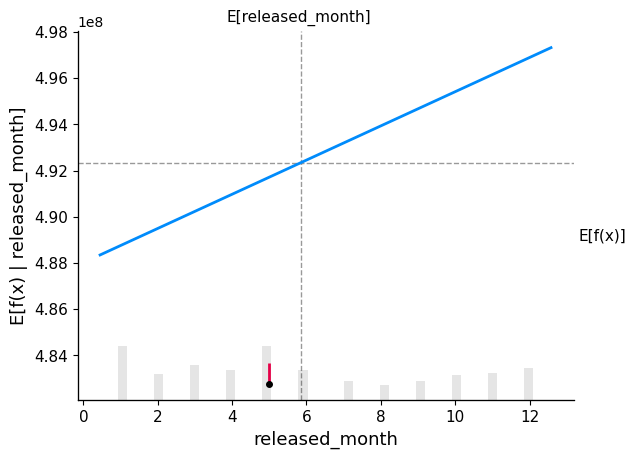

In [105]:
partial_dependence_plot('released_month', 0)

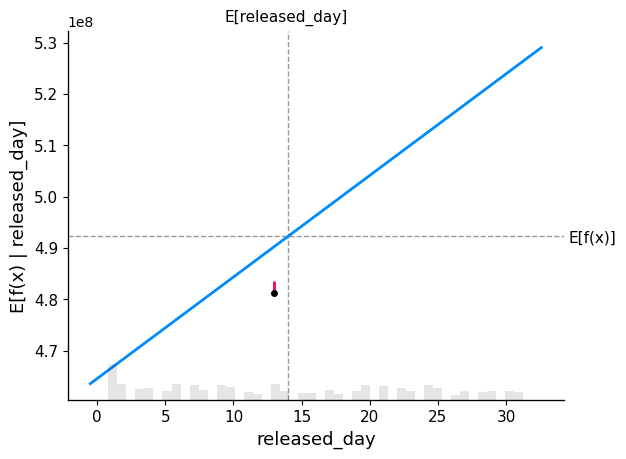

In [106]:
partial_dependence_plot('released_day', 0)

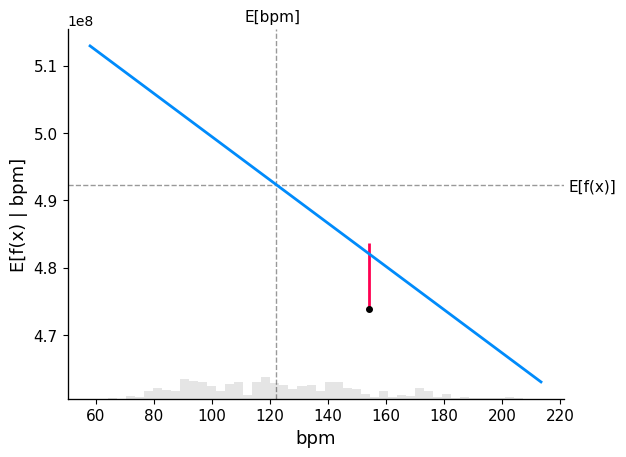

In [107]:
partial_dependence_plot('bpm', 0)

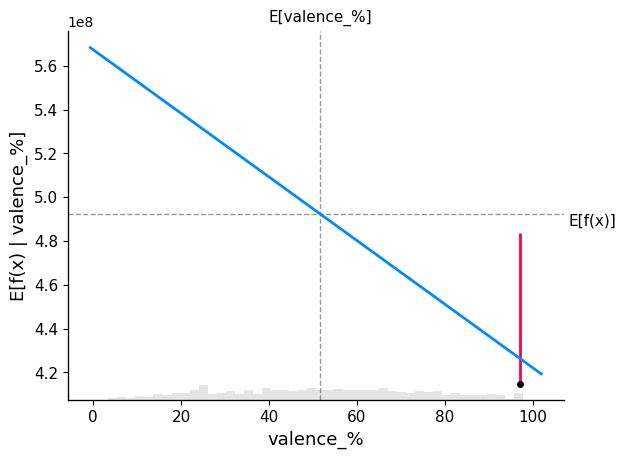

In [108]:
partial_dependence_plot('valence_%', 0)

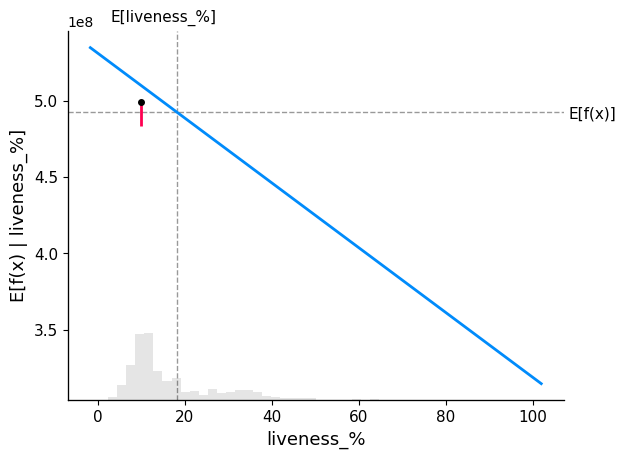

In [109]:
	partial_dependence_plot('liveness_%', 0)

In [110]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

**WATERFALL MODEL**

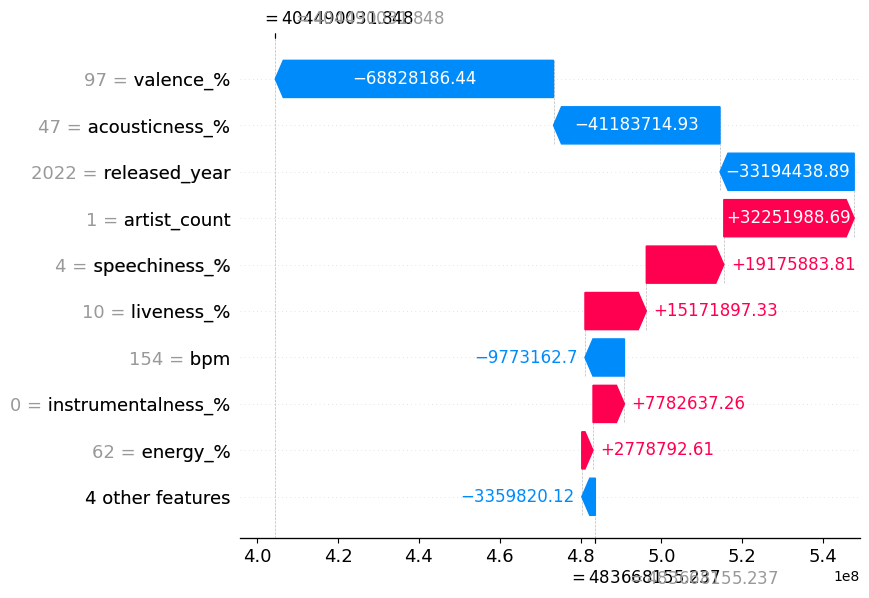

In [111]:
sample_feature_importance(0, 'waterfall')

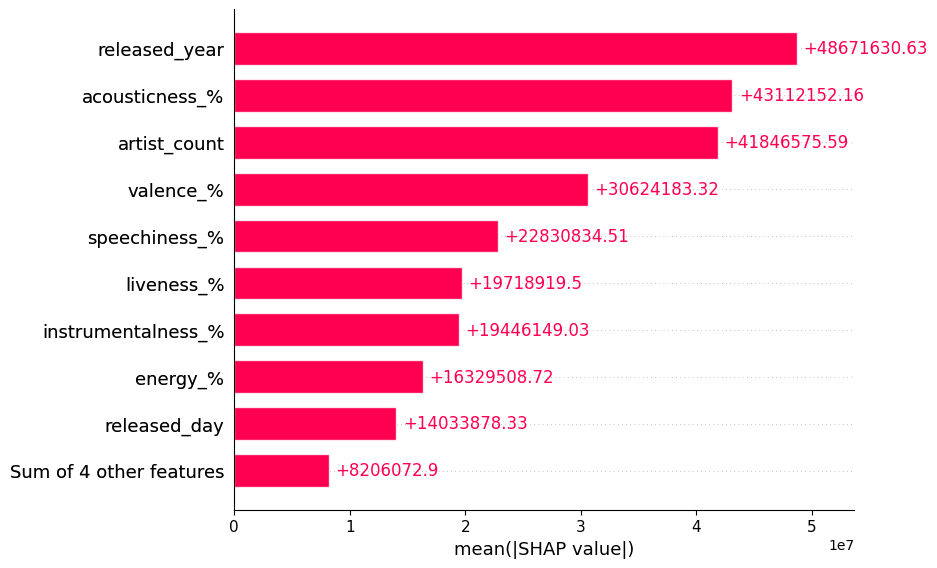

In [112]:
shap.plots.bar(shap_values)

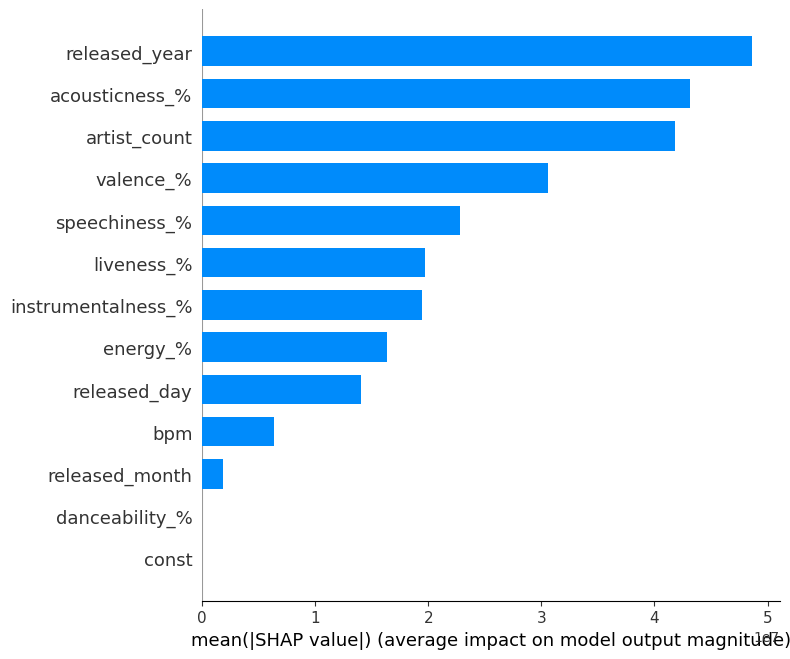

In [113]:
shap.summary_plot(shap_values.values, X4_train, plot_type='bar')


In [114]:
from sklearn.metrics import mean_absolute_error
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Preprocess the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X4_train)
X_test_preprocessed = preprocessor.transform(X4_test)

# Convert the preprocessed data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_preprocessed.astype(np.float32))
y_train_tensor = torch.tensor(y4_train.to_numpy().astype(np.float32)).view(-1, 1)
X_test_tensor = torch.tensor(X_test_preprocessed.astype(np.float32))
y_test_tensor = torch.tensor(y4_test.to_numpy().astype(np.float32)).view(-1, 1)

# Define DataLoader for the training data
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=50, shuffle=True)

# Neural network parameters
num_epochs = 50
learning_rate = 0.01
hidden_size = 32
input_dim = X_train_preprocessed.shape[1]

# Neural network model
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),  # Added ReLU activation function for non-linearity
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {running_loss / len(train_loader)}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).view(-1)
    test_mae = mean_absolute_error(y4_test, y_pred_test.numpy())
    y_pred_train = model(X_train_tensor).view(-1)
    train_mae = mean_absolute_error(y4_train, y_pred_train.numpy())

print(f"\nTrain MAE = {round(train_mae, 3)}, Test MAE = {round(test_mae, 3)}")


Epoch 0, Loss: 5.286611497225922e+17
Epoch 10, Loss: 5.6219451819239206e+17
Epoch 20, Loss: 5.334897773162159e+17
Epoch 30, Loss: 5.240016094332191e+17
Epoch 40, Loss: 5.119701604966072e+17

Train MAE = 492338933.119, Test MAE = 257812418.015


**Training Loss:**
The training loss decreases gradually over epochs, which indicates that the model is learning and improving its performance on the training data.

**Mean Absolute Error (MAE):**
The training MAE is approximately 492,338,933.119.
The test MAE is approximately 257,812,418.015.

**Comparison of MAE:**
The training MAE is higher than the test MAE, suggesting that the model may be overfitting to some extent. This is because the model performs better on the training data than on unseen test data.
However, both MAE values are quite large, indicating that the model's predictions are off by a significant margin. This could be due to various factors such as model complexity, insufficient training data, or ineffective features.

**Loss Values:**
The loss values (MSE or another chosen loss function) are extremely high, indicating that the model's predictions are far from the actual values. This suggests that the model is not effectively capturing the underlying patterns in the data.

In [115]:
shap.initjs()

In [116]:
shap_values

.values =
array([[ 0.00000000e+00,  3.22519887e+07, -3.31944389e+07, ...,
         7.78263726e+06,  1.51718973e+07,  1.91758838e+07],
       [ 0.00000000e+00,  3.22519887e+07,  3.67812205e+08, ...,
        -1.50021989e+08, -6.04753949e+06,  1.91758838e+07],
       [ 0.00000000e+00,  3.22519887e+07, -3.31944389e+07, ...,
         7.78263726e+06, -1.87792016e+07,  8.24945429e+06],
       ...,
       [ 0.00000000e+00, -2.53408483e+07, -3.31944389e+07, ...,
         7.78263726e+06,  1.94157847e+07,  1.37126690e+07],
       [ 0.00000000e+00, -8.29336852e+07, -3.31944389e+07, ...,
         7.78263726e+06,  1.09280100e+07,  1.64442764e+07],
       [ 0.00000000e+00,  3.22519887e+07, -3.31944389e+07, ...,
         7.78263726e+06,  1.30499536e+07,  1.64442764e+07]])

.base_values =
array([4.83668155e+08, 4.83668155e+08, 4.83668155e+08, 4.83668155e+08,
       4.83668155e+08, 4.83668155e+08, 4.83668155e+08, 4.83668155e+08,
       4.83668155e+08, 4.83668155e+08, 4.83668155e+08, 4.83668155e+08,
    

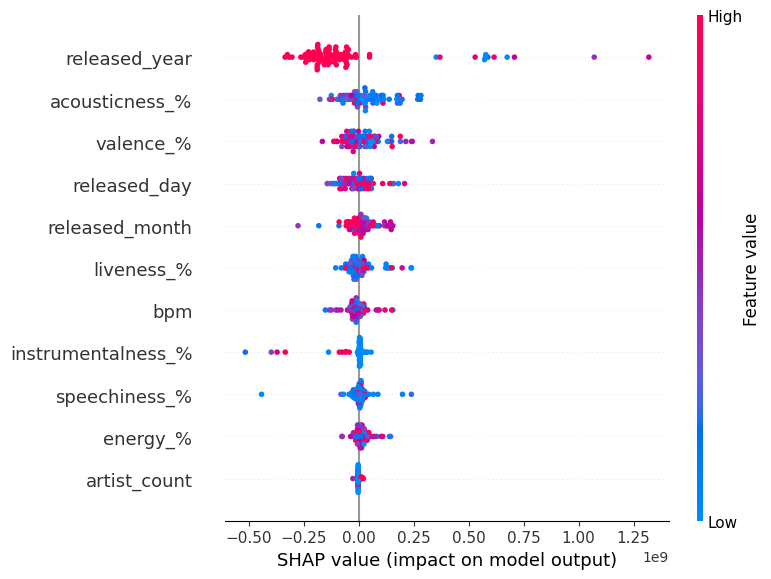

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import shap

# Assuming `X` and `y` have been defined and preprocessed appropriately
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the ColumnTransformer for the pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features)
])

# Define the modeling pipeline with DecisionTreeRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())  # Use DecisionTreeRegressor instead of RandomForestRegressor
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Initialize SHAP Explainer with the DecisionTreeRegressor model within the pipeline
model_for_explainer = pipeline.named_steps['regressor']
background_data = pipeline.named_steps['preprocessor'].transform(X_train)

explainer = shap.Explainer(model_for_explainer.predict, background_data)

# Generate SHAP values for the preprocessed test set
shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_test))

# SHAP Summary Plot
shap.summary_plot(shap_values.values, pipeline.named_steps['preprocessor'].transform(X_test), feature_names=numerical_features)


This notebook we can see that linear regression , neural netowork ,autoML values we conclude that Instrumentalness is most valuable variable.
But according to Shap Values Acousticness is more valuable variable than Instrumentalness.

We can now see how SHAP works with the data and gives us efficient value despite of any algorithm.

**CITATIONS AND REFRENCES:**

1) Many techniques used in this notebook have been adapted from the following github repository:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown

Link - https://github.com/nikbearbrown/

2) Took refrence from ChaptGPT for understanding some of the questions and for syntaxes and corrections.

3) Code corrections have also been made using Colab AI that supports generating code from natural language and a code-assisting chatbot.

4) Dataset has been utilized from Kaggle

URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

5) H20.ai- https://docs.h2o.ai/

6) OLS Model- http://net-informations.com/ds/mla/ols.html

7) Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

8) Starter codes provided by professor:
 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/Model_Interpretability_Songs.ipynb

 https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynbLinks




**MIT License**

Copyright (c) 2024: lakshmi14k

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.